### Importing the libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [40]:
df = pd.read_csv('Social_Network_Ads.csv')

In [41]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [42]:
df.shape

(400, 5)

In [50]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [52]:
df1=df.head(5)

In [96]:
df1

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [97]:
df1.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [113]:
#X = df.loc[:, ["Age","EstimatedSalary"]].values
#or
X = df1.iloc[:, [2,3]].values
y = df1.iloc[:, 4].values

In [114]:
X

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [115]:
y

array([0, 0, 0, 0, 0], dtype=int64)

### Feature Scaling

In [101]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(X)


### Splitting the dataset into the Training set and Test set


In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


### Feature Scaling

In [117]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting Decision Tree Classification to the Training set

In [118]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting the Test set results

In [119]:
y_pred = classifier.predict(X_test)

In [120]:
y_pred

array([0, 0], dtype=int64)

In [121]:
y_test

array([0, 0], dtype=int64)

In [122]:
from sklearn.metrics import accuracy_score
print("Accuracy:", classifier.score(X_test, y_test))

Accuracy: 1.0


### Making the Confusion Matrix

In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [124]:
cm

array([[2]], dtype=int64)

### Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


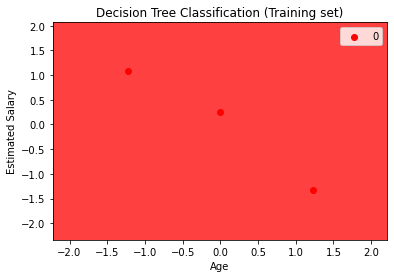

In [125]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


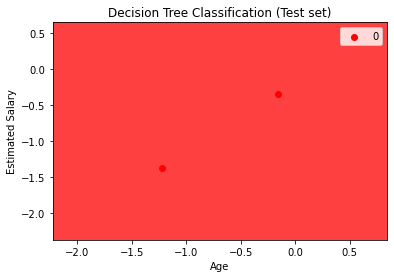

In [126]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Note : How does continuous Variable get split

In a decision tree, continuous variables are typically split by finding the optimal split point that maximizes the reduction in impurity (such as Gini impurity or entropy). This is done by evaluating all possible split points and selecting the one that results in the largest decrease in impurity. The data is then split into two groups based on the chosen split point, and the process is repeated recursively on each group until a stopping criterion is met (such as a minimum number of samples per leaf or a maximum tree depth)



## There are several different criteria that can be used to determine the best split point when constructing a decision tree:

01-Gini impurity: This measure calculates the probability of a randomly chosen sample being classified incorrectly if it were randomly labeled according to the class distribution in the current node.

02-Entropy: This measure calculates the disorder or randomness of the class distribution in the current node.

03-Misclassification Error: This measure calculates the number of misclassified samples in the current node.

04-Information gain: This measure calculates the reduction in entropy after a split is made.

05-Gain ratio : This measure tries to resolve the issue of bias towards variables with many outcomes. It is the ratio of information gain to the intrinsic information of the split.

06-Gini index: This measure calculates the probability of a sample falling into the wrong group if it were randomly assigned a class according to the group proportions in the current node.